**House Price Prediction Regression Project**

**steps in project:**
1.Business Problem

2.Importing the libararies and Load the Dataset

3.Data Preprocessing

4.Preparing the data for Model Training

5.Model selection for the Project

6.Model Training

7.Model Testing

8.Validation 
                    


**Business Problem**
    
    We need to predict the prices of the houses by using features like 'House_type' ,'no_of_rooms','location','age'(no.of years the house span).


**Data Features Descrption**
    
    

**Importing the Libararies**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn
from sklearn.preprocessing import StandardScaler

**LOAD THE DATASET**

In [7]:
train_data_path=r"D:/House_price__prediction/data/train.csv"

test_data_path=r"D:/House_price__prediction/data/test.csv"

df_train=pd.read_csv(train_data_path)
df_test=pd.read_csv(test_data_path)


In [8]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Observation:**

    'Sale price' column is present in the Train data set

In [10]:
df_train.shape

(1460, 81)

In [11]:
df_test.shape

(1459, 80)

**Data preprocessing**

In [12]:
#now we need to Concatenate the two datasets using pd.concat
df=pd.concat([df_train,df_test],axis=0) #row wise concatenated


**Observation:**
    
    Successfully the two datasets are concatenated 
    Result:2919 rows × 81 columns

In [13]:
df=df.set_index('Id')

In [14]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [16]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [17]:
df.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

**Observation:**

    Feature           Count
    
    LotFrontage       486

In [18]:
#lets check the dataset null values again and start segregation
df.columns[df.isnull().sum()>0]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

In [19]:
columns_list=['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice']
#count of individual column null value
for column in columns_list:
    count=df[column].isnull().sum()
    print(f'{column} : {count}')

MSZoning : 4
LotFrontage : 486
Alley : 2721
Utilities : 2
Exterior1st : 1
Exterior2nd : 1
MasVnrType : 1766
MasVnrArea : 23
BsmtQual : 81
BsmtCond : 82
BsmtExposure : 82
BsmtFinType1 : 79
BsmtFinSF1 : 1
BsmtFinType2 : 80
BsmtFinSF2 : 1
BsmtUnfSF : 1
TotalBsmtSF : 1
Electrical : 1
BsmtFullBath : 2
BsmtHalfBath : 2
KitchenQual : 1
Functional : 2
FireplaceQu : 1420
GarageType : 157
GarageYrBlt : 159
GarageFinish : 159
GarageCars : 1
GarageArea : 1
GarageQual : 159
GarageCond : 159
PoolQC : 2909
Fence : 2348
MiscFeature : 2814
SaleType : 1
SalePrice : 1459


In [20]:
df[df['MSZoning'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN
2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN


In [21]:
import pandas as pd

# Assuming df is your DataFrame
columns_list = ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
                'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
                'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
                'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
                'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
                'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
                'SaleType', 'SalePrice']

# Calculate null counts for each column
null_counts = {column: df[column].isnull().sum() for column in columns_list}
                #key as feature and null_value counts as value in dict

# Sort the null counts in descending order
#lambda: This keyword creates an anonymous functio
sorted_null_counts = sorted(null_counts.items(), key=lambda item: item[1], reverse=True)
"""null_counts = {'MSZoning': 5, 'LotFrontage': 10, 'Alley': 3}

# Converting the dictionary to a list of tuples:
# [('MSZoning', 5), ('LotFrontage', 10), ('Alley', 3)]
items_list = null_counts.items()

# Using the lambda function to access the second element of each tuple:
# item[1] for ('MSZoning', 5) is 5
# item[1] for ('LotFrontage', 10) is 10
# item[1] for ('Alley', 3) is 3
"""
# Print the sorted null counts
for column, count in sorted_null_counts:
    print(f'{column} : {count}')


PoolQC : 2909
MiscFeature : 2814
Alley : 2721
Fence : 2348
MasVnrType : 1766
SalePrice : 1459
FireplaceQu : 1420
LotFrontage : 486
GarageYrBlt : 159
GarageFinish : 159
GarageQual : 159
GarageCond : 159
GarageType : 157
BsmtCond : 82
BsmtExposure : 82
BsmtQual : 81
BsmtFinType2 : 80
BsmtFinType1 : 79
MasVnrArea : 23
MSZoning : 4
Utilities : 2
BsmtFullBath : 2
BsmtHalfBath : 2
Functional : 2
Exterior1st : 1
Exterior2nd : 1
BsmtFinSF1 : 1
BsmtFinSF2 : 1
BsmtUnfSF : 1
TotalBsmtSF : 1
Electrical : 1
KitchenQual : 1
GarageCars : 1
GarageArea : 1
SaleType : 1


**Observation**:

  Top Features having >400 missing values in the dataset
  
    PoolQC : 2909
    
    MiscFeature : 2814
    
    Alley : 2721
    
    Fence : 2348
    
    MasVnrType : 1766
    
    SalePrice : 1459
    
    FireplaceQu : 1420
    
    LotFrontage : 486
            
    

In [22]:
df['MSZoning'].unique()


array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

In [23]:
df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

**Features Description of having Most missing values:**

    PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
    	
    MiscFeature: Miscellaneous feature not covered in other categories
    
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

    Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

    Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
    
    MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

    FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace 
                       in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

    LotFrontage: Linear feet of street connected to property

In [24]:
df['SalePrice']

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
2915         NaN
2916         NaN
2917         NaN
2918         NaN
2919         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [25]:
df['LotFrontage']

Id
1        65.0
2        80.0
3        68.0
4        60.0
5        84.0
        ...  
2915     21.0
2916     21.0
2917    160.0
2918     62.0
2919     74.0
Name: LotFrontage, Length: 2919, dtype: float64

In [26]:
df[['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
                'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
                'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
                'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
                'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
                'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
                'SaleType', 'SalePrice']].head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD,208500.0
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD,181500.0
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD,223500.0
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD,140000.0
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD,250000.0


In [27]:
df[['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage']].head()

,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage
Id,,,,,,,
1,NaN,NaN,NaN,NaN,BrkFace,NaN,65.0
2,NaN,NaN,NaN,NaN,NaN,TA,80.0
3,NaN,NaN,NaN,NaN,BrkFace,TA,68.0
4,NaN,NaN,NaN,NaN,NaN,Gd,60.0
5,NaN,NaN,NaN,NaN,BrkFace,TA,84.0


In [28]:
#printing the data of objecct data type
obj_cols=df.select_dtypes(include='object').columns
print("Total no.of features:",obj_cols.shape[0])
print("Features_list",obj_cols.tolist())

Total no.of features: 43
Features_list ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [29]:
#printing the data of int data type
int_cols=df.select_dtypes(include='int').columns
print("Total no.of features:",int_cols.shape[0])
print("Features_list",int_cols.tolist())

Total no.of features: 25
Features_list ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [30]:
#printing the data of float data type
float_cols=df.select_dtypes(include='float').columns
print("Total no.of features:",float_cols.shape[0])
print("Features_list",float_cols.tolist())

Total no.of features: 12
Features_list ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


**Visualztions of Missing values**

<Axes: ylabel='Id'>

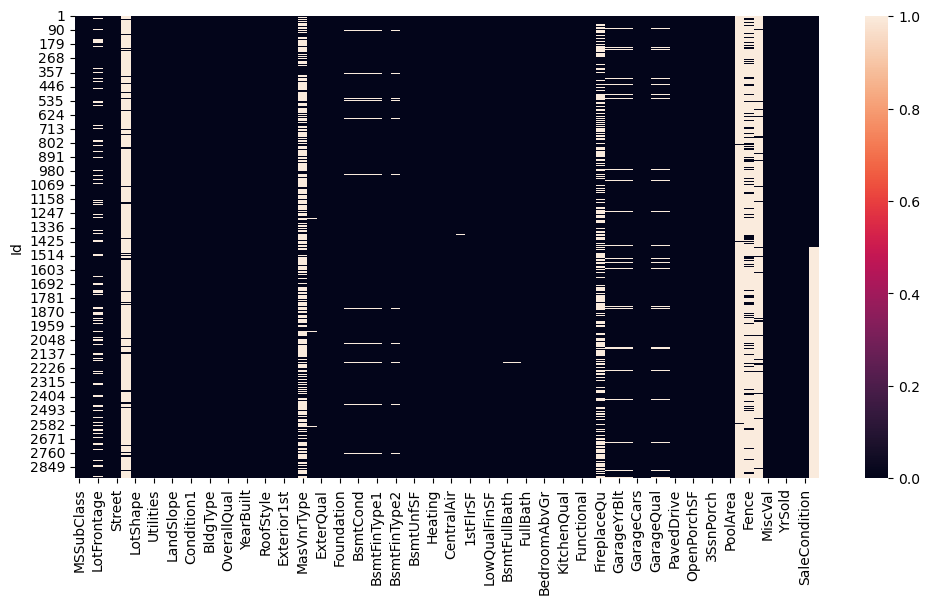

In [31]:
#using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

**Getting the null percentage...**

In [32]:
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

In [33]:
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent[null_percent>40]

Alley          93.216855
MasVnrType     60.500171
FireplaceQu    48.646797
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
SalePrice      49.982871
dtype: float64

In [34]:
null_percent[null_percent>50]

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

**Dropping the features**

In [35]:
print("""Observation:
    At checking all the dataset,as per domain knowledge we cant delete the faetures from the dataset""")

Observation:
    At checking all the dataset,as per domain knowledge we cant delete the faetures from the dataset


In [36]:
null_20_50=null_percent[(null_percent>20) & (null_percent<50)]
null_20_50

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [37]:
print("""Observation:
we cant delete the fireplace quality because fireplace may have for some houses which will impact the price of the house""")

Observation:
we cant delete the fireplace quality because fireplace may have for some houses which will impact the price of the house


#lets segregate how many type of featurees has the missing values
cat_features=null_percent[null_percent.keys().isin(obj_cols)]
cat_features

**MISSING VALUE IMPUATATION**


In [38]:
int_features=null_percent[null_percent.keys().isin(int_cols)]
int_features
print("No.of missing int features:",len(int_features))

No.of missing int features: 25


In [39]:
float_features=null_percent[null_percent.keys().isin(float_cols)]
float_features
print("No.of missing int features:",float_features)

No.of missing int features: LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64


In [40]:
cat_features=null_percent[null_percent.keys().isin(obj_cols)]

print("No.of missing Categorical features:",len(cat_features))
cat_features

No.of missing Categorical features: 43


MSZoning          0.137033
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinType2      2.740665
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.034258
KitchenQual       0.034258
Functional        0.068517
FireplaceQu      48.646797
GarageType        5.378554
GarageFinish      5.447071
GarageQual        5.447071
GarageCond        5.447071
P

**lets handle the categorical features**

In [41]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

**Observations:**
    **for obj_feature like df["MSZoning"] has mode is RL so we can replace this with null value**

In [42]:
mszoning_mode=df["MSZoning"].mode()[0]
mszoning_mode

'RL'

<Axes: xlabel='MSZoning', ylabel='count'>

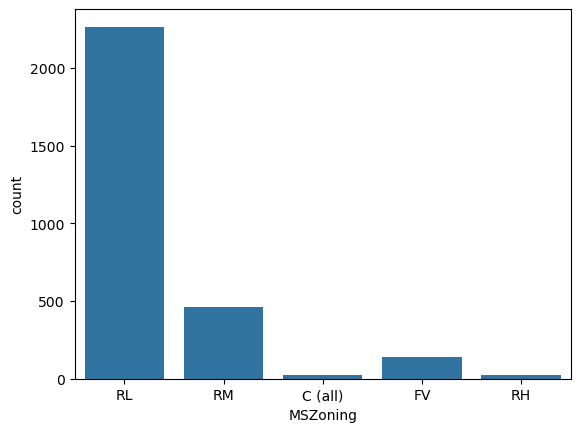

In [43]:
sns.countplot(x=df['MSZoning'])

In [44]:
#Backup for original data
df_mvi=df.copy()
df_mvi['MSZoning']=df_mvi['MSZoning'].fillna(mszoning_mode)

num=df_mvi['MSZoning'].isnull().sum()
int(num)

0

In [45]:
def old_new_countplot1(df,df_new,features):
    plt.subplot(121)
    sns.countplot(x=df['MSZoning'])
    plt.title('Old Distribuation data')
    
    plt.subplot(122)
    sns.countplot(x=df_new['MSZoning'])
    plt.title('New Distribution data')
    
    


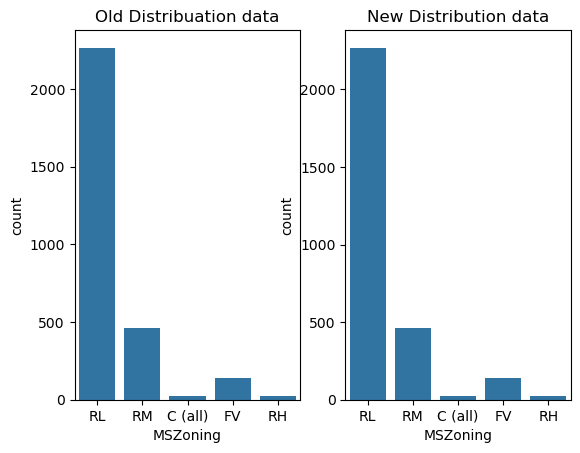

In [46]:
old_new_countplot1(df,df_mvi,'MSZoning')

**Handling the Alley Feature= 93.216855**

In [47]:
df['Alley']

Id
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
2915    NaN
2916    NaN
2917    NaN
2918    NaN
2919    NaN
Name: Alley, Length: 2919, dtype: object

In [48]:
print('''Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access''')

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access


Observation : alley cant be dropped as per the domain knowledge so we will fill with the NA string in the place of NaN


In [49]:
df_mvi['Alley'].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [50]:
alley_cnt='NA'
df_mvi['Alley']=df_mvi['Alley'].fillna(alley_cnt)
a_null=int(df_mvi['Alley'].isnull().sum())
print("Alley Null values",a_null)

Alley Null values 0


Visualization:comparsion with before and after data in the Alley feature

    

In [51]:
def old_new_countplot2(df,df_new,features):
    plt.subplot(121)
    sns.countplot(x=df['Alley'])
    plt.title('Old Distribuation data')
    
    plt.subplot(122)
    sns.countplot(x=df_new['Alley'])
    plt.title('New Distribution data')
    
    


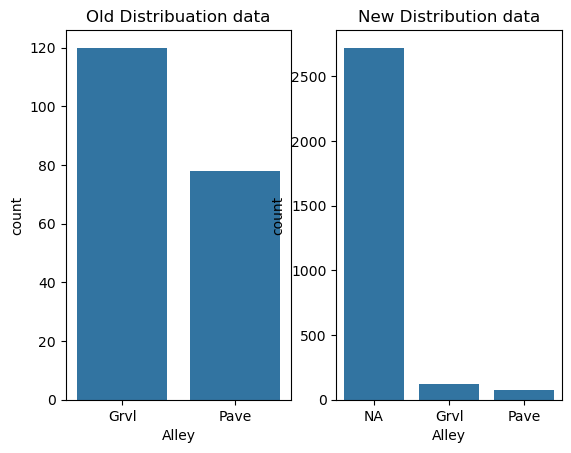

In [52]:
old_new_countplot2(df,df_mvi,df['Alley'])

**Handling LotFrontage =16.649538**

In [53]:
def box_dist_plot(df,figsize=(12,6)):
    plt.figure(figsize=figsize)
    
    plt.subplot(121)
    sns.boxplot(x=df)
    #distplot
    
    plt.subplot(122)
    sns.distplot(x=df)
    
    
    
    

C:\Users\dandu\AppData\Local\Temp\ipykernel_25116\876330526.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df)


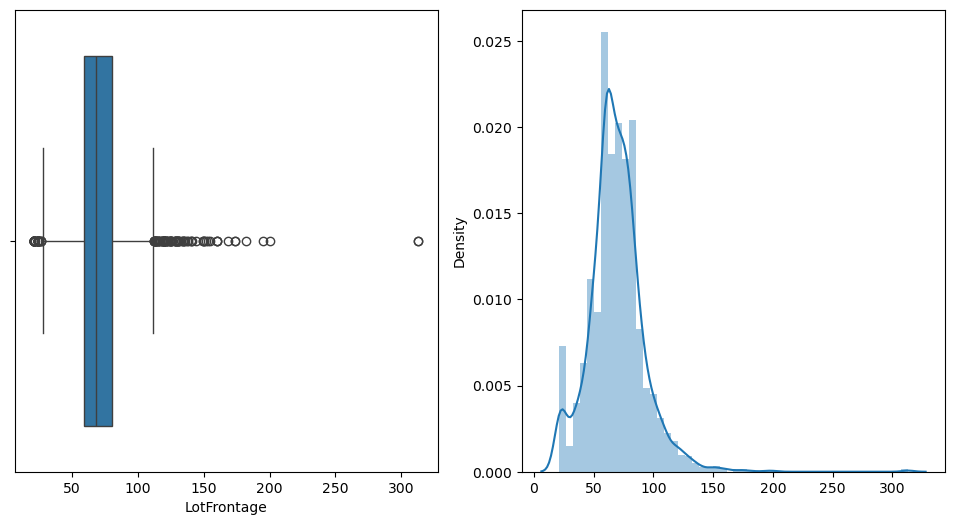

In [54]:
box_dist_plot(df['LotFrontage'])

Observation:
    We have more outliers after the max value ,it look like may be it right skewed in the distplot

In [55]:
#replacing the null value in the LotFrontage with mean (because as it is numerical feature)
lotfrontage_mean=df['LotFrontage'].mean()
float(lotfrontage_mean)
# #this mean value is filled in 
df['LotFrontage']=df['LotFrontage'].fillna(lotfrontage_mean)


In [56]:
int(df_mvi['LotFrontage'].isnull().sum())

486

**Visulaization of box plot and distplot of new and old data distribution**

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_distPlot(df, df_new, feature):
    plt.figure(figsize=(12, 10))  # Adjust figure size

    # Boxplot for Old Data
    plt.subplot(221)
    sns.boxplot(data=df, x=feature)
    plt.title('Old Data Boxplot')

    # Histogram + KDE for Old Data
    plt.subplot(222)
    sns.distplot(x=df[feature])
    plt.title('Old Data Distribution')

    # Boxplot for New Data
    plt.subplot(223)
    sns.boxplot(data=df_new, x=feature)
    plt.title('New Data Boxplot')

    # Histogram + KDE for New Data
    plt.subplot(224)
    sns.distplot(x=df_new[feature])
    plt.title('New Data Distribution')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Example Call:
# box_distPlot(df, df_new, 'MSZoning')


C:\Users\dandu\AppData\Local\Temp\ipykernel_25116\2963092045.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[feature])


C:\Users\dandu\AppData\Local\Temp\ipykernel_25116\2963092045.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_new[feature])


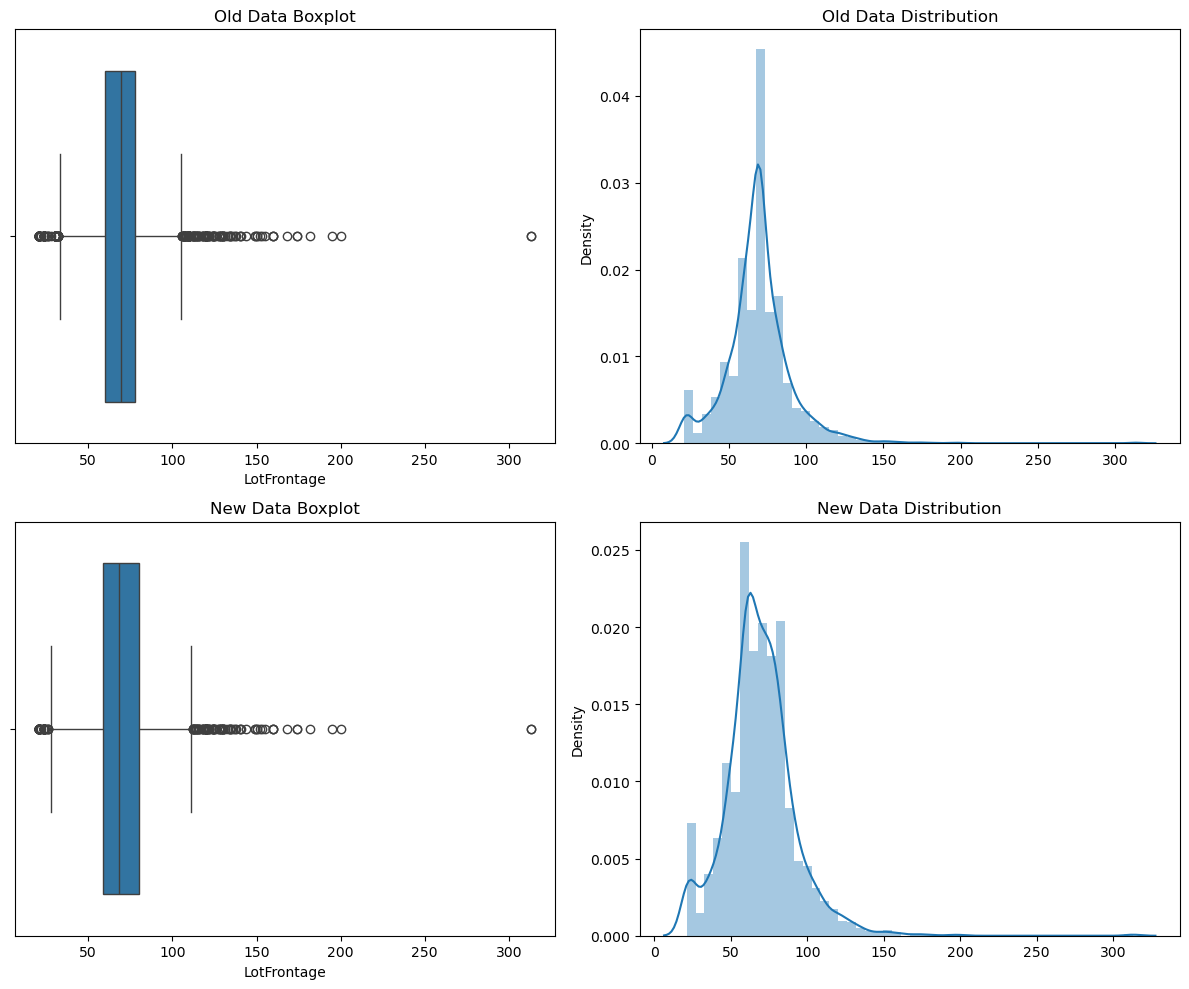

In [58]:
box_distPlot(df,df_mvi,"LotFrontage")

**Handling the Utilities =0.068517**

In [59]:
df['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [60]:
print('''Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only''')

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [62]:
utilities_mode = df['Utilities'].mode()[0]

# Correct way to replace null values
df_mvi['Utilities'] = df_mvi['Utilities'].fillna(utilities_mode)
u_null=df_mvi['Utilities'].isnull().sum()
print("Utilties Null values",int(u_null))


Utilties Null values 0


**Handling Exterior1st    0.034258 Exterior2nd    0.034258**

In [63]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

Handling the Exterior1st

In [64]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [65]:
exterior1_mode = df['Exterior1st'].mode()[0]

# Correct way to replace null values
df_mvi['Exterior1st'] = df_mvi['Exterior1st'].fillna(exterior1_mode)
e1_null=df_mvi['Exterior1st'].isnull().sum()
print("Exterior1st Null values",int(e1_null))

Exterior1st Null values 0


In [66]:
exterior2_mode = df['Exterior2nd'].mode()[0]

# Correct way to replace null values
df_mvi['Exterior2nd'] = df_mvi['Exterior2nd'].fillna(exterior2_mode)
e2_null=df_mvi['Exterior2nd'].isnull().sum()
print("Exterior2nd Null values",int(e2_null))

Exterior2nd Null values 0


In [67]:
#handling MasVnrType=0.822199 MasVnrArea=0.787941

In [68]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

<Axes: ylabel='Id'>

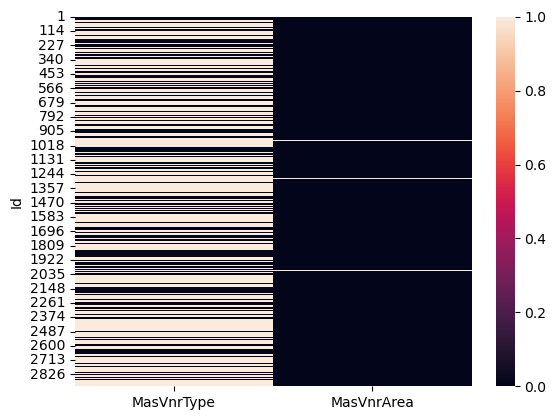

In [69]:
sns.heatmap(df[['MasVnrType','MasVnrArea']].isnull())

In [70]:
df[df[['MasVnrType','MasVnrArea']].isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN


In [71]:
df["MasVnrArea"].value_counts()

MasVnrArea
0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: count, Length: 444, dtype: int64

In [72]:
mas_vnr_type_mode=df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"]=df_mvi["MasVnrType"].fillna(mas_vnr_type_mode)
ans2=df_mvi['MasVnrType'].isnull().sum()
print('MasVnrType null values:',int(ans2))

MasVnrType null values: 0


In [73]:
mas_area_cons=0
df['MasVnrArea']=df['MasVnrArea'].fillna(mas_area_cons)
ans3=df['MasVnrArea'].isnull().sum()
print("MasVnrArea has null values",int(ans3))

MasVnrArea has null values 0


**Handling Basement Features**

In [74]:
"""categorical_type_features=
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinType2      2.740665
""float_type features
    BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517

"""



'categorical_type_features=\nBsmtQual          2.774923\nBsmtCond          2.809181\nBsmtExposure      2.809181\nBsmtFinType1      2.706406\nBsmtFinType2      2.740665\n""float_type features\n    BsmtFinSF1       0.034258\nBsmtFinSF2       0.034258\nBsmtUnfSF        0.034258\nTotalBsmtSF      0.034258\nBsmtFullBath     0.068517\nBsmtHalfBath     0.068517\n\n'

In [75]:
cat_type_base=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
float_type_base=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']



<Axes: ylabel='Id'>

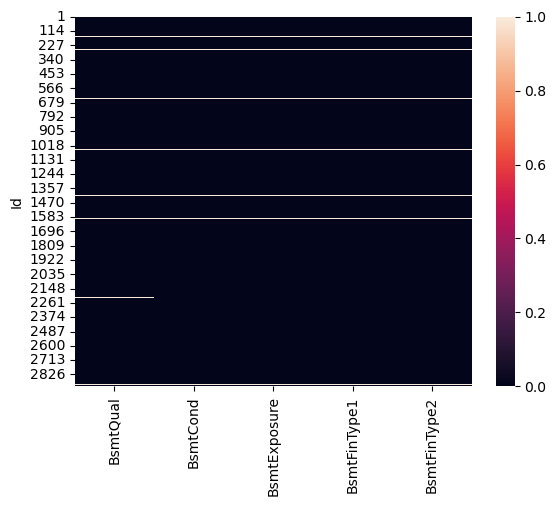

In [76]:
#lets know outliers using heatmap
sns.heatmap(df[cat_type_base].isnull())

In [77]:
#lets view the values of each feature in the cat_type_base list
for feat in cat_type_base:
    print(f"{feat} value count are {df[feat].value_counts()}")

BsmtQual value count are BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
BsmtCond value count are BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
BsmtExposure value count are BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
BsmtFinType1 value count are BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
BsmtFinType2 value count are BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [78]:
#lets fill the null value as constant '0'
base_cat_cons='NA'
for feat in cat_type_base:
    df_mvi[feat]=df_mvi[feat].fillna(base_cat_cons)
    

In [79]:
df_mvi[cat_type_base].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

**Observation:**
    'Succesfully inserted the filled null values'

<Axes: ylabel='Id'>

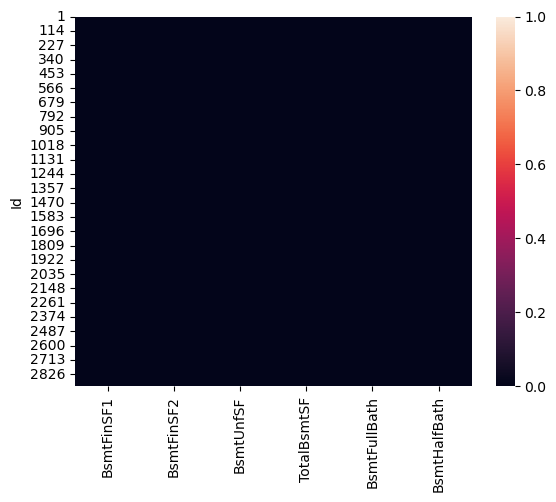

In [80]:
sns.heatmap(df[float_type_base].isnull())

**Observations**
    In where the categorical features is null same null value position for the float type feature

In [81]:
#so we can fill the constant value zero for missing values
base_num=0
for feat in float_type_base:
    df_mvi[feat]=df_mvi[feat].fillna(base_num)

In [82]:
df_mvi[float_type_base].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

**Handling Electrical        0.034258
KitchenQual       0.034258**

In [83]:
df['Electrical'].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [84]:
df['KitchenQual'].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [85]:
#lets fill the mode value because as missing values are very less in two features
elec_mode=df['Electrical'].mode()[0]
df_mvi['Electrical']=df_mvi['Electrical'].fillna(elec_mode)
val_null=int(df_mvi['Electrical'].isnull().sum())
print('Electrical feature null values :',val_null)

Electrical feature null values : 0


In [86]:
#lets fill the mode value because as missing values are very less in two features
kitch_mode=df['KitchenQual'].mode()[0]
df_mvi['KitchenQual']=df_mvi['KitchenQual'].fillna(kitch_mode)
val_null=int(df_mvi['KitchenQual'].isnull().sum())
print('Kitchen feature null values :',val_null)

Kitchen feature null values : 0


**Handling the Below Features**

In [87]:
"""Functional        0.068517 #mode
FireplaceQu      48.646797 #NA
PoolQC           99.657417 #NA
Fence            80.438506 #NA
MiscFeature      96.402878 #NA
SaleType          0.034258  #mode"""

'Functional        0.068517 #mode\nFireplaceQu      48.646797 #NA\nPoolQC           99.657417 #NA\nFence            80.438506 #NA\nMiscFeature      96.402878 #NA\nSaleType          0.034258  #mode'

In [88]:
df['Functional'].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [89]:
df['SaleType'].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [90]:
#now lets fill the null values in the above 2 features by using mode value
cons_mode=df_mvi['Functional'].mode()[0]
cons_mode2=df_mvi['SaleType'].mode()[0]
df_mvi['Functional']=df_mvi['Functional'].fillna(cons_mode)
df_mvi['SaleType']=df_mvi['SaleType'].fillna(cons_mode2)

In [91]:
df_mvi['Functional'].isnull().sum()

0

In [92]:
df_mvi['SaleType'].isnull().sum()

0

In [93]:
#lets fill the reaminig null values in the following features
other_fea=['FireplaceQu','PoolQC','Fence','MiscFeature']
for feat in other_fea:
    #displaying the values
    print(f"Value in :{df[feat].value_counts()}")

Value in :FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Value in :PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value in :Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value in :MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [94]:
cons_na="NA"
for feat in other_fea:
    #filling the  null values
    df_mvi[feat]=df_mvi[feat].fillna(cons_na)

In [95]:
df_mvi[other_fea].isnull().sum()

FireplaceQu    0
PoolQC         0
Fence          0
MiscFeature    0
dtype: int64

In [96]:
"""cat_features_garage=
GarageType        5.378554 #NA
GarageFinish      5.447071 #NA
GarageQual        5.447071 #NA
GarageCond        5.447071 #NA

num_feat=
GarageYrBlt      5.447071 0
GarageCars       0.034258 0
GarageArea       0.034258 0"""


'cat_features_garage=\nGarageType        5.378554 #NA\nGarageFinish      5.447071 #NA\nGarageQual        5.447071 #NA\nGarageCond        5.447071 #NA\n\nnum_feat=\nGarageYrBlt      5.447071 0\nGarageCars       0.034258 0\nGarageArea       0.034258 0'

In [97]:
#categorical_features of garage filling the  missing values as "NA" because as there is no garage in that house
cat_feat_garage=['GarageType','GarageFinish','GarageQual','GarageCond']
#numerical_features of garage filling the missing values as '0' because as there is no garage in that house
num_feat_garage=['GarageYrBlt','GarageCars','GarageArea']


In [98]:
garage_cat_cons='NA'
for feat in cat_feat_garage:
    df_mvi[feat]=df_mvi[feat].fillna(garage_cat_cons)

garage_num_cons=0
for feat in num_feat_garage:
    df_mvi[feat]=df_mvi[feat].fillna(garage_num_cons)

    

In [99]:
#now lets check null values count in the garage features 
df_mvi[cat_feat_garage].isnull().sum()


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [100]:
df_mvi[num_feat_garage].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [101]:
df_mvi.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [102]:
missing_rows = df_mvi[df_mvi.isnull().any(axis=1)]
print(missing_rows)  # Show all rows with NaN values


      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
8             60       RL          NaN    10382   Pave    NA      IR1   
13            20       RL          NaN    12968   Pave    NA      IR2   
15            20       RL          NaN    10920   Pave    NA      IR1   
17            20       RL          NaN    11241   Pave    NA      IR1   
25            20       RL          NaN     8246   Pave    NA      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2915         160       RM         21.0     1936   Pave    NA      Reg   
2916         160       RM         21.0     1894   Pave    NA      Reg   
2917          20       RL        160.0    20000   Pave    NA      Reg   
2918          85       RL         62.0    10441   Pave    NA      Reg   
2919          60       RL         74.0     9627   Pave    NA      Reg   

     LandContour Utilities LotConfig  ... PoolArea

**Feature Transformation**

In [103]:
#Conversion Numerical Features to Categorical Features
num_conv_cat=['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
#now just check their dtypes of each feature
for feat in num_conv_cat:
    print(f"{feat} :{df_mvi[feat].dtype}")

MSSubClass :int64
YearBuilt :int64
YearRemodAdd :int64
GarageYrBlt :float64
MoSold :int64
YrSold :int64


In [104]:
#lets check the unique values in the MoSold
df_mvi['MoSold'].unique()


array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [105]:
import calendar
#now lets the map the month number as month name using calendar library
df_mvi['MoSold']=df_mvi['MoSold'].apply(lambda x:calendar.month_abbr[x])
#lets print the unique values
df_mvi['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [106]:
for feat in num_conv_cat:
    df_mvi[feat]=df_mvi[feat].astype(str)
    print(f'{feat} :{df_mvi[feat].dtype}')

MSSubClass :object
YearBuilt :object
YearRemodAdd :object
GarageYrBlt :object
MoSold :object
YrSold :object


In [107]:
df_mvi['SalePrice'] = df_mvi['SalePrice'].fillna(df['SalePrice'].median())

In [108]:
df_mvi.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

**Observation:** 
**successfully converted into the numerical feature to categorical feature**

**now lets converting the categorical features into Numerical Features**

Using Ordinal Encoding method


ordinal_encode_features=['Functional','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence','GarageFinish','PavedDrive','Utilities']

print(f'Total No.of Features in Ordinal Encode Features:{len(ordinal_encode_features)}')

Now lets apply the encoding methods using the pandas.api.type importing CategoricalDtype

In [109]:
from pandas.api.types import CategoricalDtype

In [110]:
df_mvi['ExterQual'].value_counts()

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [111]:
df_mvi['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [112]:
df_mvi['ExterQual']=df_mvi['ExterQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes


In [113]:
df_mvi['ExterQual'].value_counts()

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64

In [114]:
#now performing same encoding method in the 
df_mvi['BsmtExposure'].value_counts()

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: count, dtype: int64

In [115]:
df_mvi['BsmtExposure']=df_mvi['BsmtExposure'].astype(CategoricalDtype(categories=['No','NA','Mn','Av','Gd'],ordered=True)).cat.codes
df_mvi['BsmtExposure'].value_counts()

BsmtExposure
0    1904
3     418
4     276
2     239
1      82
Name: count, dtype: int64

In [116]:
df_mvi['BsmtExposure']

Id
1       0
2       4
3       2
4       0
5       3
       ..
2915    0
2916    0
2917    0
2918    3
2919    3
Name: BsmtExposure, Length: 2919, dtype: int8

In [117]:
ord_num_feat=['Functional','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence','GarageFinish','PavedDrive','Utilities']
print(f"{len(ord_num_feat)}")

18


In [118]:
df_mvi['Functional'].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [119]:
df_mvi['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [120]:
df_mvi['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

In [121]:
df_mvi['BsmtCond'].unique()

array(['TA', 'Gd', 'NA', 'Fa', 'Po'], dtype=object)

In [122]:
df_mvi['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'], dtype=object)

In [123]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [124]:
df_mvi['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [125]:
df_mvi['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [126]:
df_mvi['FireplaceQu'].unique()

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [127]:
df_mvi['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po'], dtype=object)

In [128]:
df_mvi['PoolQC'].unique()

array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

In [129]:
df_mvi['Fence'].unique()

array(['NA', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [130]:
df_mvi['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [131]:
df_mvi['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

**now lets applying the ordinal encoding method on the categorical features.**

In [132]:
df_mvi['Functional'].value_counts()

Functional
Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [133]:
category_mappings = {
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    #'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    #'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQC': ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
    #'Fence': ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
    'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
    'PavedDrive': ['N', 'P', 'Y'],
    'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
}

# Apply encoding to each column
for col, categories in category_mappings.items():
    cat_type = CategoricalDtype(categories=categories, ordered=True)
    df_mvi[col] = df_mvi[col].astype(cat_type).cat.codes


In [134]:
encoded_mvi=['Functional',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'GarageFinish',
 'PavedDrive',
 'Utilities']

In [135]:
df_mvi[encoded_mvi].value_counts()

Functional  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  HeatingQC  KitchenQual  FireplaceQu  GarageQual  GarageCond  PoolQC  Fence  GarageFinish  PavedDrive  Utilities
7           3          2          4         3         0             1             1             4          3            0            3           3           0       NA     2             2           3            45
                                                                    6             1             4          3            0            3           3           0       NA     2             2           3            37
                                                                    1             1             4          3            4            3           3           0       NA     3             2           3            31
            2          2          3         3         0             1             1             2          2            0            3           3    

**For Nominal Categorical Features we use One Hot Encoding method**

In [136]:
df_encode=df_mvi.copy()

In [137]:
object_features=df_encode.select_dtypes(include='object').columns.tolist()
print("No.of Features:",len(object_features))
object_features


No.of Features: 32


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [138]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [139]:
#pd.get_dummies(df_encode['MSZoning'],columns='MSZoning',prefix='MSZoning',drop_first=False).astype(int)

Observation:
    usiing astype(int) for the one hot encoding is important beacuse it just replace the value False and True as the value in the above columns as false as 0 and True as 1

In [140]:
df_encode.shape

(2919, 80)

In [141]:
df_encode.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,3,Inside,...,0,0,NA,NA,0,Feb,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,3,FR2,...,0,0,NA,NA,0,May,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,3,Inside,...,0,0,NA,NA,0,Sep,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,3,Corner,...,0,0,NA,NA,0,Feb,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,3,FR2,...,0,0,NA,NA,0,Dec,2008,WD,Normal,250000.0


In [142]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [143]:
df_encode[object_features].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,SBrkr,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,Y,SBrkr,Attchd,1976.0,NA,NA,May,2007,WD,Normal
3,60,RL,Pave,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,SBrkr,Attchd,2001.0,NA,NA,Sep,2008,WD,Normal
4,70,RL,Pave,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Y,SBrkr,Detchd,1998.0,NA,NA,Feb,2006,WD,Abnorml
5,60,RL,Pave,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,Y,SBrkr,Attchd,2000.0,NA,NA,Dec,2008,WD,Normal


In [144]:
#pd.get_dummies(df_encode['MSZoning'],columns='MSZoning',prefix='MSZoning',drop_first=False).astype(int)

In [145]:
df_encode.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,3,Inside,...,0,0,NA,NA,0,Feb,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,3,FR2,...,0,0,NA,NA,0,May,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,3,Inside,...,0,0,NA,NA,0,Sep,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,3,Corner,...,0,0,NA,NA,0,Feb,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,3,FR2,...,0,0,NA,NA,0,Dec,2008,WD,Normal,250000.0


In [146]:
import pandas as pd

# Convert True/False to 0/1 for all columns
df_encode = df_encode.apply(lambda col: col.map(lambda x: 1 if x is True else (0 if x is False else x)))

# Ensure only existing columns are used
existing_object_features = [col for col in object_features if col in df_encode.columns]

# Apply one-hot encoding only on valid categorical columns
df_encode = pd.get_dummies(df_encode, columns=existing_object_features, prefix=existing_object_features, drop_first=True)

# Print final shape
print("Shape of df after encoding:", df_encode.shape)


Shape of df after encoding: (2919, 512)


In [147]:
df_encode.head()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,3,7,5,196.0,3,2,4,3,...,False,False,False,False,True,False,False,False,True,False
2,80.0,9600,3,6,8,0.0,2,2,4,3,...,False,False,False,False,True,False,False,False,True,False
3,68.0,11250,3,7,5,162.0,3,2,4,3,...,False,False,False,False,True,False,False,False,True,False
4,60.0,9550,3,7,5,0.0,2,2,3,4,...,False,False,False,False,True,False,False,False,False,False
5,84.0,14260,3,8,5,350.0,3,2,4,3,...,False,False,False,False,True,False,False,False,True,False


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [149]:
df_encode.select_dtypes(include='object').columns.tolist()

[]

**splitting the data for training and testing**

In [150]:
len_train=df_train.shape[0]

In [151]:

x_train=df_encode[:len_train].drop('SalePrice',axis=1)
y_train=df_encode['SalePrice'][:len_train]
x_test=df_encode[len_train:].drop("SalePrice",axis=1)
print("Shape of x_train data:",x_train.shape)
print("Shape of y_train data:",y_train.shape)
print("Shape of x_test data:",x_test.shape)

Shape of x_train data: (1460, 511)
Shape of y_train data: (1460,)
Shape of x_test data: (1459, 511)


In [152]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Change 'mean' to 'median', 'most_frequent', etc.
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)



**Feature Scaling**

In [153]:
#using Standard Scaler for Feature Scaling -(helps to improve the accurcy of machine learing models and also make it easier for the speed up the training process)

In [154]:
sc=StandardScaler()
sc.fit(x_train)
#formula:z=(x-mu)/std
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [155]:
#displying the values in scaler
x_train[:3,:]

array([[-0.22937175, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.4519361 , -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.09311018,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [156]:
x_test[:3,:]

array([[ 0.4519361 ,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.49735662,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.17941296,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

**Displaying the every column mean**

In [157]:
 sc.mean_

array([7.00499584e+01, 1.05168281e+04, 2.99863014e+00, 6.09931507e+00,
       5.57534247e+00, 1.03685262e+02, 2.39589041e+00, 2.08356164e+00,
       3.48904110e+00, 2.93493151e+00, 1.00342466e+00, 3.54589041e+00,
       4.43639726e+02, 1.24726027e+00, 4.65493151e+01, 5.67240411e+02,
       1.05742945e+03, 3.14520548e+00, 1.16262671e+03, 3.46992466e+02,
       5.84452055e+00, 1.51546370e+03, 4.25342466e-01, 5.75342466e-02,
       1.56506849e+00, 3.82876712e-01, 2.86643836e+00, 1.04657534e+00,
       2.51164384e+00, 6.51780822e+00, 6.84178082e+00, 6.13013699e-01,
       1.82534247e+00, 1.71575342e+00, 1.76712329e+00, 4.72980137e+02,
       2.81027397e+00, 2.80890411e+00, 1.85616438e+00, 9.42445205e+01,
       4.66602740e+01, 2.19541096e+01, 3.40958904e+00, 1.50609589e+01,
       2.75890411e+00, 1.30136986e-02, 4.34890411e+01, 0.00000000e+00,
       4.31506849e-02, 6.84931507e-03, 2.05479452e-02, 3.67123288e-01,
       4.72602740e-02, 2.73972603e-03, 8.21917808e-03, 9.86301370e-02,
      

In [158]:
sc.n_features_in_

511

In [159]:
sc.scale_

array([2.20164789e+01, 9.97784611e+03, 5.23244637e-02, 1.38252284e+00,
       1.11241818e+00, 1.80507263e+02, 5.74083750e-01, 3.50933666e-01,
       8.76178133e-01, 5.51969384e-01, 1.47048191e+00, 2.10705360e+00,
       4.55941866e+02, 8.92026722e-01, 1.61264017e+02, 4.41715605e+02,
       4.38555057e+02, 9.59172174e-01, 3.86455322e+02, 4.36378914e+02,
       4.86064268e+01, 5.25300394e+02, 5.18732867e-01, 2.38670868e-01,
       5.50727099e-01, 5.02713131e-01, 8.15498620e-01, 2.20262727e-01,
       6.63532501e-01, 1.62483655e+00, 6.67468828e-01, 6.44445572e-01,
       1.81025661e+00, 8.92525151e-01, 7.47059036e-01, 2.13731608e+02,
       7.22650132e-01, 7.19438635e-01, 4.96421800e-01, 1.25295863e+02,
       6.62333334e+01, 6.10982138e+01, 2.93072887e+01, 5.57383170e+01,
       4.01635452e+01, 2.03988886e-01, 4.95953090e+02, 1.00000000e+00,
       2.03196219e-01, 8.24766752e-02, 1.41865172e-01, 4.82020518e-01,
       2.12195053e-01, 5.22706412e-02, 9.02863400e-02, 2.98164775e-01,
      

In [160]:
sc.with_mean

True

In [161]:
sc.with_std

True

In [162]:
sc.n_samples_seen_

1460

In [163]:
#carrry Forward for the Deployment
# sc.mean_
# sc.n_features_in_
# sc.n_samples_seen_
# sc.scale_
# sc.var_
# sc.with_mean
# sc.with_std

**MODEL TRAINING**

In [164]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor






In [165]:
#creating the object for every algorithm class

In [166]:
svr=SVR()
lr=LinearRegression()
sgd=SGDRegressor()
knr=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
ir=IsotonicRegression()
mlpr=MLPRegressor()
xgbr=XGBRegressor()


In [167]:
models={
    'a':['LinearRegression',lr],
    'b':['SVR',svr],
    'c':['SGDRegressor',sgd],
    'd':['KneighborsRegressor',knr],
    'e':['GaussianProcessRegressor',gpr],
    'f':['DecisionTreeRegressor',dtr],
    'g':['GradientBoostingRegressor',gbr],
    'h':['RandomForestRegressor',rfr],
    'i':['XGBRegressor',xgbr],   
    'j':['MLPRegressor',mlpr]
}

In [168]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score


def test_model(model, x_train, y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring=r2)
    return r2_val_score.mean()


In [169]:
model_score=[]
for model in models:
    print("Training model:", models[model][0])
    score = test_model(models[model][1], x_train, y_train)
    print("Score of model:", score)
    model_score.append([models[model][0],score])

# # Print final scores
# print("\nModel Scores:", models_score)


Training model: LinearRegression


Score of model: -1.0899237550739421e+25
Training model: SVR
Score of model: -0.052138032033288165
Training model: SGDRegressor
Score of model: -13229.856972496416
Training model: KneighborsRegressor
Score of model: 0.5538046273820607
Training model: GaussianProcessRegressor
Score of model: -5.398756456372902
Training model: DecisionTreeRegressor
Score of model: 0.656758215360522
Training model: GradientBoostingRegressor
Score of model: 0.8681646909980362
Training model: RandomForestRegressor
Score of model: 0.8412524425199159
Training model: XGBRegressor
Score of model: 0.8412391364101278
Training model: MLPRegressor


c:\Users\dandu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dandu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dandu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dandu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\dandu\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Score of model: -4.82273547971822


c:\Users\dandu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [170]:
# Sort models based on performance
model_score.sort(key=lambda x: x[1], reverse=True)

# Pick top 3 models
top_models = model_score[:3]  # Select best 3 models
print("Top Models for Fine-Tuning:", top_models)


Top Models for Fine-Tuning: [['GradientBoostingRegressor', 0.8681646909980362], ['RandomForestRegressor', 0.8412524425199159], ['XGBRegressor', 0.8412391364101278]]


In [171]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for top models
param_grids = {
    "GradientBoostingRegressor": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7]
    },
    "RandomForestRegressor": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "XGBRegressor": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7]
    }
}

best_models = {}

# Fine-tune the top models
for model_name, model_score in top_models:
    if model_name in param_grids:
        print(f"Tuning {model_name}...")
        model = next(m[1] for m in models.values() if m[0] == model_name)
        
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring="r2", n_jobs=-1)
        grid_search.fit(x_train, y_train)
        
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best Params for {model_name}: {grid_search.best_params_}")


Tuning GradientBoostingRegressor...
Best Params for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Tuning RandomForestRegressor...
Best Params for RandomForestRegressor: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Tuning XGBRegressor...
Best Params for XGBRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [172]:
x_test=pd.DataFrame(x_test)
x_test.dropna(inplace=True)
x_test = x_test.to_numpy()

In [173]:
best_model_name = max(best_models, key=lambda name: best_models[name].score(x_train, y_train))
best_model = best_models[best_model_name]
print(f"Selected Best Model: {best_model_name}")


Selected Best Model: GradientBoostingRegressor


In [174]:
import joblib

# Save the best model
joblib.dump(best_model, 'house_price_model.pkl')

# Save the scaler
joblib.dump(sc, 'scaler.pkl')

# Save the imputer (if used)
joblib.dump(imputer, 'imputer.pkl')

# Save the list of encoded columns (if applicable)
import json
with open('encoded_columns.json', 'w') as f:
    json.dump(existing_object_features, f)

In [175]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

# Generate cross-validated predictions
y_train_pred = cross_val_predict(best_model, x_train, y_train, cv=5)

# Calculate R² score
r2 = r2_score(y_train, y_train_pred)
print(f"Cross-Validated R² Score: {r2:.4f}")


Cross-Validated R² Score: 0.8835


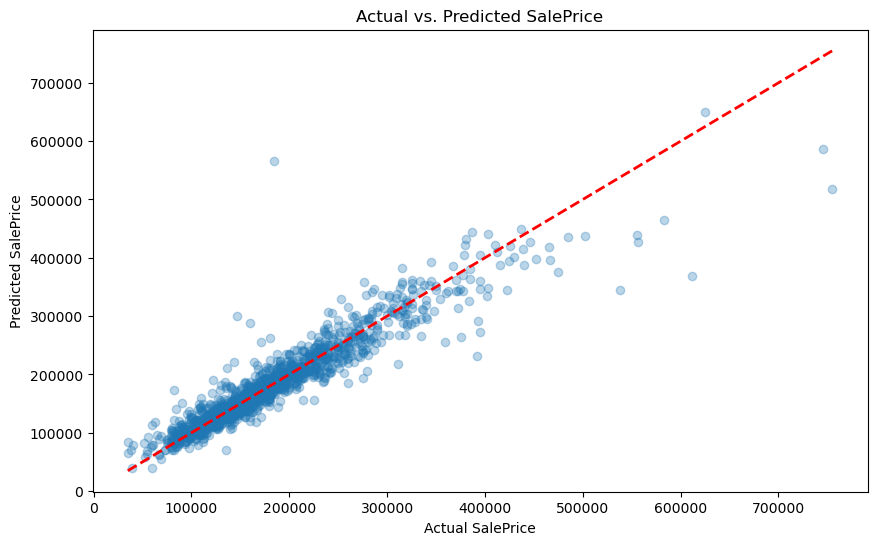

In [176]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice')
plt.show()


In [177]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Re-train the model
best_model = GradientBoostingRegressor()
best_model.fit(x_train, y_train)

# Save the model
joblib.dump(best_model, 'house_price_model.pkl')

['house_price_model.pkl']